<a href="https://colab.research.google.com/github/gumdropsteve/intro_to_machine_learning/blob/main/day_02/01_loss_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cost (Loss) Functions
- [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error)
- [Mean Absolute Error](https://en.wikipedia.org/wiki/Mean_absolute_error)
- [Root Mean Squared Error](https://en.wikipedia.org/wiki/Root-mean-square_deviation)
- [Residual Sum of Squares](https://en.wikipedia.org/wiki/Residual_sum_of_squares)
- [Precision, Recall, Accuracy](https://en.wikipedia.org/wiki/Precision_and_recall)
- [Confusion Matrix](https://en.wikipedia.org/wiki/Confusion_matrix)
- [Gradient Descent](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html)

#### Some Videos
- [Loss Functions Explained](https://www.youtube.com/watch?v=IVVVjBSk9N0)
- [Loss Functions - EXPLAINED!](https://www.youtube.com/watch?v=QBbC3Cjsnjg)
- [Machine learning fundamentals (I): Cost functions and gradient descent](https://towardsdatascience.com/machine-learning-fundamentals-via-linear-regression-41a5d11f5220) (not a video)


> Source: [What is Machine Learning?](https://jakevdp.github.io/PythonDataScienceHandbook/05.01-what-is-machine-learning.html)
 though?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, recall_score, precision_score


## Regression Cost Functions

---

#### Mean Squared Error
[Reference](https://en.wikipedia.org/wiki/Mean_squared_error)


In [2]:
preds = np.array([10, 9, 10, 9, 10, 9, 10, 9, 10])

In [3]:
labels = np.array([10, 9, 10, 2, 3, 5, 7, 19, 21])

In [9]:
mean_squared_error(preds, labels)

38.22222222222222

#### Mean Absolute Error
[Reference](https://en.wikipedia.org/wiki/Mean_absolute_error)

![](https://www.gstatic.com/education/formulas2/355397047/en/mean_absolute_error.svg)


In [4]:
mean_absolute_error(preds, labels)

4.666666666666667

#### Root Mean Squared Error

[Reference](https://en.wikipedia.org/wiki/Root-mean-square_deviation#:~:text=The%20root%2Dmean%2Dsquare%20deviation,estimator%20and%20the%20values%20observed.&text=RMSD%20is%20the%20square%20root%20of%20the%20average%20of%20squared%20errors.)

![](https://www.gstatic.com/education/formulas2/355397047/en/root_mean_square_deviation.svg)


In [11]:
mean_squared_error(preds, labels, squared=False)

6.182412330330469

#### Residual Sum of Squared Error
[Reference](https://en.wikipedia.org/wiki/Residual_sum_of_squares)

![](https://www.gstatic.com/education/formulas2/355397047/en/residual_sum_of_squares.svg)


## Classification

precision 
- is the fraction of relevant instances among the retrieved instances
-(also called positive predictive value)

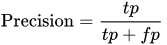

recall 
- is the fraction of relevant instances that were retrieved.
- (also known as sensitivity) 

Both precision and recall are therefore based on relevance.

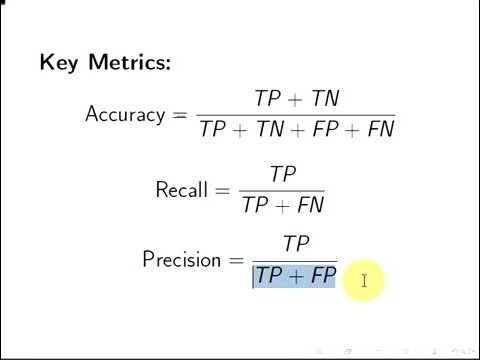



In [12]:
# Load data and drop NaN values
df = pd.read_csv("seattle_weather_1948-2017.csv").dropna()

df_temp = df.copy()

In [13]:
# Note 

# x --> future state "tomorrow"
# x-1 --> today
# x-2 --> yesterday


# Create function to perform our heuristic

def heuristic(df):
    
    """
    Simple heuristic:
    
    If it rained the past two days then predict rain else predict no rain
    
    Frist two rows are predicted false be default
    """
    
    preds = []
    for x in range(len(df)):
        # If first two rows then predict false
        if x <2:
            preds.append(False)
        else:
            # If either of last two days == True then predict true
            if (df.iloc[x-1]["RAIN"] == True) | (df.iloc[x-2]["RAIN"] == True):
                preds.append(True)
            else:
                # Predict false if the above is not true
                preds.append(False)
    return preds


def calc_confuse(df):
    
    "Calculate all possible results of a confusion matrix"

    # Hold all possible values and set to zero
    FP = np.zeros(len(df))
    TP = np.zeros(len(df))
    FN = np.zeros(len(df))
    TN = np.zeros(len(df))
    
    for x in range(len(df)):
        
        # True Positive
        if (df["RAIN"].iloc[x] == True) & (df["preds"].iloc[x] == True):
            TP[x] = 1
        # True Negative
        elif (df["RAIN"].iloc[x] == False) & (df["preds"].iloc[x] == False):
            TN[x] = 1
        # False Negative
        elif (df["RAIN"].iloc[x] == True) & (df["preds"].iloc[x] == False):
            FN[x] = 1
        # False Positive
        else:
            FP[x] = 1
    
    return FP, TP, FN, TN




In [14]:
df["preds"] = heuristic(df) # Create a column of predictions

confuse_ls = [w,x,y,z] = calc_confuse(df) # Calculate confusion matrix stats
col_names = ["FP", "TP", "FN", "TN"] # Create column name ls

# Create new columns
for x in range(len(confuse_ls)):
    df[col_names[x]] = confuse_ls[x]

# Look at 10 random rows to determine the accuracy
df.sample(10)

,DATE,PRCP,TMAX,TMIN,RAIN,preds,FP,TP,FN,TN
12901,1983-04-28,0.00,71,46,False,True,1.0,0.0,0.0,0.0
2430,1954-08-27,0.00,70,49,False,True,1.0,0.0,0.0,0.0
21131,2005-11-08,0.04,50,38,True,True,0.0,1.0,0.0,0.0
10448,1976-08-09,0.00,72,58,False,True,1.0,0.0,0.0,0.0
10666,1977-03-15,0.00,48,38,False,True,1.0,0.0,0.0,0.0
7119,1967-06-29,0.00,73,56,False,False,0.0,0.0,0.0,1.0
24584,2015-04-23,0.12,54,44,True,True,0.0,1.0,0.0,0.0
5443,1962-11-26,0.52,46,41,True,True,0.0,1.0,0.0,0.0
6289,1965-03-21,0.01,50,42,True,False,0.0,0.0,1.0,0.0
7107,1967-06-17,0.00,83,58,False,False,0.0,0.0,0.0,1.0


<AxesSubplot:xlabel='RAIN', ylabel='count'>

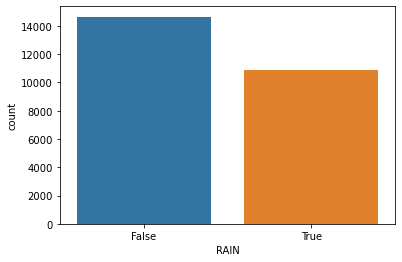

In [16]:
# Look at our target class distribution
sns.countplot(data=df, x='RAIN')

(array([  12.,   49.,  154.,  683., 3292., 6431., 6379., 6641., 1819.,
          88.]),
 array([ 0. ,  7.1, 14.2, 21.3, 28.4, 35.5, 42.6, 49.7, 56.8, 63.9, 71. ]),
 <BarContainer object of 10 artists>)

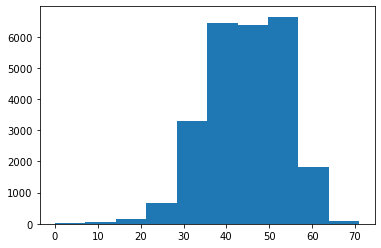

In [25]:
# sns.countplot(data=df_rain, x='TMIN')

plt.hist(df['TMIN'], bins=10)

In [34]:
# Create function to perform our heuristic

def heuristic_temp(df):
    
    """
    Simple heuristic:

    """
    
    preds = []
    for x in range(len(df)):
        # If first two rows then predict false
        if x <2:
            preds.append(False)
        else:
            # If either of last two days == True then predict true
            if (df.iloc[x-1]["TMIN"] > 35) & (df.iloc[x-1]["TMIN"] < 55):
                preds.append(True)
            else:
                # Predict false if the above is not true
                preds.append(False)
    return preds


def calc_confuse(df):
    
    "Calculate all possible results of a confusion matrix"

    # Hold all possible values and set to zero
    FP = np.zeros(len(df))
    TP = np.zeros(len(df))
    FN = np.zeros(len(df))
    TN = np.zeros(len(df))
    
    for x in range(len(df)):
        
        # True Positive
        if (df["RAIN"].iloc[x] == True) & (df["preds"].iloc[x] == True):
            TP[x] = 1
        # True Negative
        elif (df["RAIN"].iloc[x] == False) & (df["preds"].iloc[x] == False):
            TN[x] = 1
        # False Negative
        elif (df["RAIN"].iloc[x] == True) & (df["preds"].iloc[x] == False):
            FN[x] = 1
        # False Positive
        else:
            FP[x] = 1
    
    return FP, TP, FN, TN

In [27]:
df_temp["preds"] = heuristic_temp(df_temp) # Create a column of predictions

confuse_ls = [w,x,y,z] = calc_confuse(df_temp) # Calculate confusion matrix stats
col_names = ["FP", "TP", "FN", "TN"] # Create column name ls

# Create new columns
for x in range(len(confuse_ls)):
    df_temp[col_names[x]] = confuse_ls[x]

# Look at 10 random rows to determine the accuracy
df_temp.sample(10)

,DATE,PRCP,TMAX,TMIN,RAIN,preds,FP,TP,FN,TN
13230,1984-03-22,0.14,55,44,True,True,0.0,1.0,0.0,0.0
3921,1958-09-26,0.00,69,48,False,True,1.0,0.0,0.0,0.0
8800,1972-02-04,0.00,39,24,False,False,0.0,0.0,0.0,1.0
11928,1980-08-28,0.07,65,51,True,True,0.0,1.0,0.0,0.0
5221,1962-04-18,0.00,77,42,False,True,1.0,0.0,0.0,0.0
8606,1971-07-25,0.00,86,59,False,True,1.0,0.0,0.0,0.0
22735,2010-03-31,0.00,51,37,False,True,1.0,0.0,0.0,0.0
9590,1974-04-04,0.25,50,43,True,True,0.0,1.0,0.0,0.0
22817,2010-06-21,0.00,63,51,False,True,1.0,0.0,0.0,0.0
6091,1964-09-04,0.00,75,54,False,True,1.0,0.0,0.0,0.0


In [31]:
# Calculate Accuracy
(sum(df_temp["TP"]) + sum(df_temp["TN"])) / len(df_temp)


0.5204712697667137

In [33]:
df_temp["RAIN"].value_counts(normalize=True)

False    0.573352
True     0.426648
Name: RAIN, dtype: float64

## Model Evaluation Metrics for 

In [32]:
# Calculate Accuracy
(sum(df["TP"]) + sum(df["TN"])) / len(df_temp)

0.6706591514012838